线性回归处理数量足够特征少的样本集
岭回归/拉索回归处理数量少特征多的样本集

In [26]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
import sklearn.datasets as datasets
from sklearn.metrics import r2_score

In [2]:
np.random.seed(100)

In [31]:
x = np.random.randn(50,200)

In [32]:
coef = 3*np.random.randn(200)

In [33]:
index = np.arange(200)
np.random.shuffle(index)

In [34]:
coef[index[10:]]=0

In [35]:
y = np.dot(x,coef)

In [36]:
y +=0.01*np.random.normal((200,))

In [40]:
x_train = x[:40]
y_train = y[:40]
x_test = x[40:]
y_test = y[40:]


(10, 200)

In [44]:
lr = LinearRegression()
lr.fit(x_train,y_train)
lr_predict = lr.predict(x_test)
r2_score(y_test,lr_predict)

-1.2382240114790388

In [45]:
ridge = Ridge(alpha=0.5)
ridge.fit(x_train,y_train)
ridge_predict = ridge.predict(x_test)
r2_score(y_test,ridge_predict)

-1.270480619173647

In [46]:
lasso = Lasso(alpha=0.3)
lasso.fit(x_train,y_train)
lasso.score(x_test,y_test)
lasso_predict = ridge.predict(x_test)
r2_score(y_test,lasso_predict)

-1.270480619173647

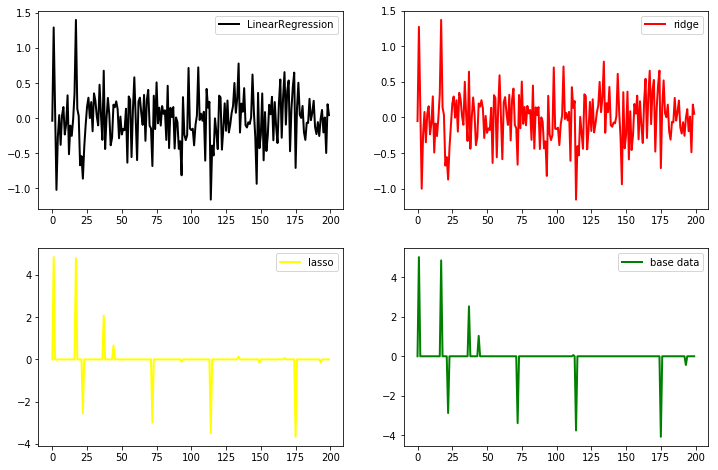

In [47]:
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
plt.plot(lr.coef_, color="black", lw=2, label="LinearRegression")
plt.legend()
plt.subplot(2,2,2)
plt.plot(ridge.coef_, color="red", lw=2, label="ridge")
plt.legend()
plt.subplot(2,2,3)
plt.plot(lasso.coef_, color="yellow", lw=2, label="lasso")
plt.legend()
plt.subplot(2,2,4)
plt.plot(coef, color="green", lw=2, label="base data")
plt.legend()
plt.show()